# Exercise 2 Linear Regression using sklearn

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

- Last activity I chose the combination of Temperature and Fuel rate, lets input the the data

In [28]:
temp = [271.8, 264, 238.8, 230.7, 251.6, 257.9, 263.9]
fuel_rate = [16.66, 16.46, 17.66, 17.5, 16.4, 16.28, 16.06]

- Lets put it in a data frame for uniformity

In [29]:
df = pd.DataFrame({"Temp":temp,"fuel_rate":fuel_rate})
df

,Temp,fuel_rate
0,271.8,16.66
1,264.0,16.46
2,238.8,17.66
3,230.7,17.50
4,251.6,16.40
5,257.9,16.28
6,263.9,16.06


- Describing the data

In [30]:
df.describe()

,Temp,fuel_rate
count,7.000000,7.000000
mean,254.100000,16.717143
std,14.774302,0.618431
min,230.700000,16.060000
25%,245.200000,16.340000
50%,257.900000,16.460000
75%,263.950000,17.080000
max,271.800000,17.660000


- checking the correlations

In [40]:
df.corr()

,Temp,fuel_rate
Temp,1.000000,-0.795493
fuel_rate,-0.795493,1.000000


- it has a negative correlation which means if the temperature rise the Fuel rate will decrease, based in r correlation 0.7 is considered moderately high corelation

- Try to plot the data

Text(0.5, 0, 'Temperature')

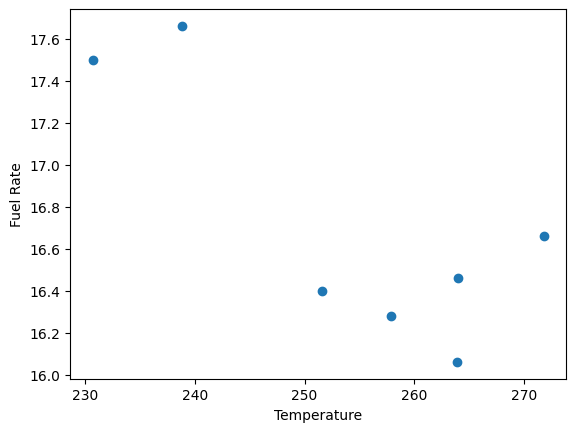

In [69]:
plt.scatter(df.Temp, df.fuel_rate)
plt.ylabel("Fuel Rate")
plt.xlabel("Temperature")

- based by the r-value, its expected the trend of the fuel rate is going down while there is an increase of temperature. but I guess its not that strong

- lets create the regression model

In [45]:
linear = LinearRegression()
linear

LinearRegression()

- lets train the model

In [46]:
X = np.array(df.Temp).reshape(-1,1) # Reshaping the x values / Transposing it to fit
y = df.fuel_rate
linear.fit(X, y)

LinearRegression()

In [49]:
X.shape # Effects of reshaping the X values

(7, 1)

- After that we have a successful Linear Regression Model.

- for the Simple Linear Regression Model like this we have a formula of
  $$
      y = a + bx
  $$
- which can be easily calculated by shope of the attributes of the model

In [55]:
b = linear.coef_  # This is the b part
b[0]

np.float64(-0.03329821024983199)

In [56]:
a = linear.intercept_ # while this is ther a part
a

np.float64(25.178218081625165)

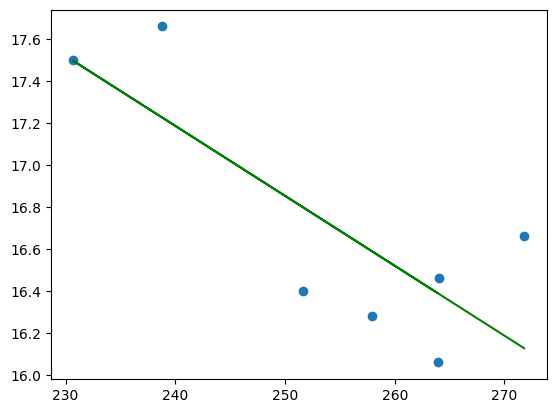

In [70]:
# we can create
model = X*b+a # Based in the Linear Regression Formula y = a + bx
plt.scatter(X,y)
fig = plt.plot(X,model,color="green")

- Lets to the metrics

In [73]:
# Visually it can predict digits
y_pred = linear.predict(X)
y_pred

array([16.12776454, 16.38749058, 17.22660547, 17.49632098, 16.80038838,
       16.59060966, 16.3908204 ])

- with sklearn, you have access to library of metrics

In [86]:
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

r_squared = r2_score(y, y_pred)
r_squared

0.6328094428859885

In [87]:
MSE = mean_squared_error(y, y_pred)
MSE

np.float64(0.12037255830681212)

In [89]:
RMSE = root_mean_squared_error(y, y_pred)
RMSE

np.float64(0.34694748638203465)

In [ ]:
# Villamor Kurt